# Clasificación naive-Bayes

## Ejemplos del empleo de los clasificadores

Un __clasificador es un método supervisado__ que permite entrenar un modelo para que determine __la clase más probable__ que debemos asignar a un registro dado de características. Para ello el conjunto de entrenamiento tendrá una serie de $N$ registros clasificados, que permiten al ordenador aprender a clasificar registros sin clase. Por ejemplo:

- __Detección de SPAM__. En base a un conjunto de características de los correos se entrena con supervisión al ordenador para que determine si son o no SPAM.
- __Datos de microarrays__. A partir de un subconjunto de genes óptimos para diagnosticar cancer.

## Resumen del método Naïve Bayes

Si la matriz $X$ está compuesta por $N$ observaciones (filas) con $n$ características $X_1, ..., X_i, ..., X_n$ que forman las columnas de la matriz.

Si la matriz de objetivos $Y$ tiene $m$ clases dadas por $1, ..., k, ..., m$.

Una observación $\bar{x}=(x_1, x_2, \cdots, x_n)$, no etiquetada, de acuerdo al __Teorema de Bayes__ se etiqueta en aquella clase $k$ que cumple:

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} P(k)P(\bar{x}|k)$$

Si hacemos la __suposición Naïve__ de que los valores de las características $X_i$ son __independientes__ entre si y tienen una __distribución normal__ gaussiana (para los valores $X_i$ asociados a una clase $k$ (columna __i__ de la matriz $X$ filtrada por la clase __k__) se conoce su media $\mu_{i,k}$ y varianza $\sigma_{i,k}^{2}$)

Una observación $\bar{x}=(x_1, x_2, \cdots, x_n)$, no etiquetada, pertenece a la clase $k$ si tiene máximo el valor: 

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} \frac{n_k}{N}\prod\limits_{i=1}^{n} N(x_i, \mu_{i,k}\thinspace, \sigma_{i,k}^2)$$

Donde:

- $N(x_i, \mu_{i,k}\thinspace, \sigma_{i,k}^2)$ : es la función de densidad normal gaussiana del valor $x_i$ observado en la columna $X_i$ para la clase $k$.
- $\frac{n_k}{N}$ : es la frecuencia de la clase $k$ en la matriz $X$ se obtiene a partir del número de observaciones etiquetadas como clase $k$ sobre el total.

Observe que para definir el modelo son necesarias $n \times m$ distribuciones normales distintas.

Con la __suposición Naïve__ de que los valores de las características $X_i$ son __independientes__ entre si y si todos los $X_i$ son valores discretos en el intervalo por ejemplo $(1,...,p, ...)$ se pueden calcular sus __frecuencias__ y resolver: 

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} \frac{n_k}{N}\prod\limits_{i=1}^{n} f_{k,i}(p)$$

Siendo $f_{k,i}(p)$ la frecuencia de aparición del valor $p$ en la columna $i$ en aquellas observaciones del conjunto de entrenamiento clasificadas como $k$.

$$f_{k,i}(p)=\frac{n_{k,i,p}}{n_k}$$

Siendo $n_{k,i,p}$ el número de elementos del conjunto de entrenamiento que cumple $x_i=p$ además de $y=k$

Siendo $n_k$ el número de elementos del conjunto de entrenamiento que cumple $y=k$

## Detalle del método Naïve Bayes

### Definición de probabilidad condicionada
La probabilidad del suceso $A$ condicionada a que ocurra el suceso $B$ viene dado por la probabilidad de la intersección $A \cap B$ divido por la probabilidad de $B$ (casos probables entre casos posibles en este contexto):

$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$

<img src="images/Bayes_1.png" width="300px">

De la anterior ecuación se pueden deducir las siguientes dos ecuaciones:

$$P(A \cap B)=P(B)P(A|B)$$
$$P(A \cap B)=P(A)P(B|A)$$

### Probabilidad en una partición
Si en un espacio muestral $S$ se consideran $k$ sucesos disjuntos $A_1, A_2, ..., A_k$ de forma que $\cup^k_{i=1} A_i=S$, se dice que estos sucesos constituyen una partición de $S$ y se cumple

$$B = (A_1\cap B)\cup (A_2\cap B)\cup ... \cup (A_k\cap B)$$

Y como los sucesos de la derecha son disjuntos se cumplirá que
$$P(B) = \sum ^k _{j=1} P(A_j \cap B) = \sum ^k _{j=1} P(A_j) P(B|A_j) $$

<img src="images/Bayes_2.png" width="400px">

### Enunciado y demostración del teorema de Bayes

__Teorema de Bayes.__ Dada la partición $A_1, A_2, ..., A_k$ del espacio $S$ tal que $P(A_j)\gt 0$ para $j=1,...,k$ y sea $B$ cualquier suceso tal que $P(B) \gt 0$. Entonces para $i=1,...,k$:

$$P(A_i|B)=\frac{P(A_i)P(B|A_i)}{\sum ^k _{j=1} P(A_j) P(B|A_j)} \hspace{1em} (1)$$

__La demostración__ viene dada por la definición de probabilidad condicionada:

$$P(A_i|B)=\frac{P(A_i \cap B)}{P(B)}$$

El numerador de la parte derecha de la ecuación $(1)$ es igual a $P(A_i \cap B)$ y el denominador es igual a $P(B)$

### Probabilidad de clasificar un vector de atributos en una clase

Sabiendo que un registro de nuestro conjunto tiene __$\bar{x}$ como vector de atributos__, ¿__cuál es la probabilidad de clasificarla en la clase $y=k$__? Aplicando el teorema de Bayes:

$$P(k|\bar{x})=\frac{P(k)P(\bar{x}|k)}{P(\bar{x})}$$

- $P(\bar{x}|k)$ se denomina __verosimilitud__ (likelihood).
- $P(k|\bar{x})$ se llama __probabilidad a posteriori__ de la clase (posterior).
- $P(k)$ se llama __probabilidad a priori__ de la clase.
- $P(\bar{x})$ se llama __verosimilitud marginal__ (o probabilidad a priori del vector de atributos).

__Se tomará aquella clase cuya probabilidad a posteriori es mayor__

- Es decir, aquella clase $y=k$ cuya $P(k|\bar{x})$ sea máxima:

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} P(k|\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} \frac{P(k)P(\bar{x}|k)}{P(\bar{x})} $$

- Y como $P(\bar{x})$ no depende de $k$ __bastará con tomar el valor máximo de__:

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} P(k)P(\bar{x}|k)$$

### Suposición Naïf

- Los atributos observados en cualquier instancia son __independientes__ una vez que sabemos que la instancia pertenece a la clase $k$. Esto es si el vector $\bar{x}$ está formado por $n$ atributos ($\bar{x}=(x_1, x_2, ..., x_n)$). La probabilidad $P(\bar{x}|k)$ es:

$$P(\bar{x}|k) = P(x_1|k)P(x_2|k) \cdots P(x_n|k)=\prod\limits_{i=1}^{n}P(x_i|k)$$

### Estimación de probabilidades

__Estimar $P(k)$ es tan sencillo como calcular la frecuencia de la clase en el conjunto de entrenamiento__:

$$P(k)=\frac{n_{k}}{N}$$

Siendo $n_{k}$ el número de registros de clase $k$ en el conjunto de entrenamiento. Y $N$ el total de elementos en el conjunto de entrenamiento.

__Estimar la verosimilitud $P(x_i|k)$ depende de__:

- Si los __atributos $x_i$ son discretos__ (caso DNA splicing) se cuentan las frecuencias.
- Si los __atributos $x_i$ son continuos__ (caso conjunto Iris) se supone que _cada atributo_ se distribuye de acuerdo a una distribución normal: 

$$
P(x_i|k)\sim N(\mu_{i,k} \thinspace , \sigma_{i,k}^2)
$$

y se utiliza la función de densidad gaussiana:

$$
P(x_i|k)=\phi(x_i,\mu_{i,k}\thinspace,\sigma_{i,k}^2)=\frac{1}{\sqrt{2\pi}\sigma_{i,k}}exp\left(-\frac{x_i-\mu_{i,k}^2}{2\sigma_{i,k}^2}\right)
$$


### Características de la clasificación Naïve-Bayes

__Ventajas__:
- __Simple__, rápido y efectivo.
- Da buenos resultados con __datos con ruido__.
- Requiere __relativamente pocos registros__ para entrenar, y también funciona bien con grandes conjuntos de datos.
- Proporciona fácilmente la probabilidad estimada para cada __predicción__.

__Inconvenientes__:
- Supone independencia entre atributos, lo cual normalmente es __falso__.
- En general no funciona bien con __atributos numéricos__, sobre todos si hay muchos.
- La clasicación predicha es __más creíble__ que las probabilidades estimadas. Esto es debemos confiar más en el resultado $c$ obtenido en que en el valor numérico $P(c|x)$ como probabalidad.


## Aplicar el método Naïve-Bayes para clasificar el conjunto Iris

__El conjunto de datos de Iris se encuentra en la librería sk-learn__, por lo que se importa de ahí

   - Primero se vuelca a un DataFrame, con 4 columnas con sus caracteristicas y una columna con la clasificación objetivo
   - Se muestra la descripción de cada uno de los valores (0, 1, 2) objetivo.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Inicialmente se divide el conjunto de datos de entrada en Entrenamiento (75%) y Validación (25%). Conjuntos Train y Test

 - Para hacer esta división del conjunto se utiliza una función de la librería sk-learn: __train_test_split__
 - Los parámetro __train_test__ o __test_size__ : indica el ratio que tiene el conjunto de entrenamiento o validación respecto al total.
 - El parámetro __shuffle__ : indica si los datos se barajan antes de dividirse
 - El parámetro __random_state__ : se indica que la división aleatoria ha de ser reproducible
 - El parámetro __stratity__ : indica que la división se realiza proporcional a los valores de las etiquetas
 
 Mas detalles : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
from sklearn.model_selection import train_test_split
X, y = df.values[:,0:4], df.values[:,4]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [5]:
y_test

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 2., 2., 2., 1., 2., 1., 0., 0.,
       2., 0., 1., 2., 1., 1., 0., 2., 0., 0., 1., 2., 1., 0., 1., 2., 2.,
       0., 1., 2., 2.])

## Implementación directa de la fórmula Naive Bayes

### Cálculo de las Medias por clase y característica

In [6]:
### Vector de Medias
import numpy as np
numClases = np.size(np.unique(df['target']))
mean_vectors = []
for cl in range(numClases):
    mean_vectors.append(np.mean(X_train[y_train==cl], axis=0))
    print('Vector Media clase %s: %s\n' %(cl, mean_vectors[cl]))

Vector Media clase 0: [5.00540541 3.42432432 1.44324324 0.24864865]

Vector Media clase 1: [5.8972973  2.72702703 4.23513514 1.32432432]

Vector Media clase 2: [6.67368421 2.96842105 5.58421053 2.03421053]



In [7]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
w_df = pd.DataFrame(mean_vectors, columns=cols)
w_df.insert(0, 'Variedad', iris['target_names'])
w_df.head()

,Variedad,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.005405,3.424324,1.443243,0.248649
1,versicolor,5.897297,2.727027,4.235135,1.324324
2,virginica,6.673684,2.968421,5.584211,2.034211


### Cálculo de las Desviaciones Típicas por clase y característica

In [8]:
### Vector de Desviaciones Estándar
import numpy as np
numClases = np.size(np.unique(df['target']))
sds_vectors = []
for cl in range(numClases):
    sds_vectors.append(np.std(X_train[y_train==cl], axis=0))
    print('Desviación estándar clase %s: %s\n' %(cl, sds_vectors[cl]))

Desviación estándar clase 0: [0.37772144 0.40895741 0.17636041 0.1029868 ]

Desviación estándar clase 1: [0.50268817 0.30637254 0.51001654 0.20189026]

Desviación estándar clase 2: [0.63523067 0.32126826 0.58558397 0.25160152]



__Nota:__ 

La expresión __y_train==cl__ devuelve una lista de true/false dependiendo de si se cumple la comparación.

El array/arreglo __X_train[y_train==cl]__ es una copia de los datos de __X_train__ cuando la condición es __true__

In [9]:
y_train==cl

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True])

In [10]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
w_df = pd.DataFrame(sds_vectors, columns=cols)
w_df.insert(0, 'Variedad', iris['target_names'])
w_df.head()

,Variedad,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,0.377721,0.408957,0.176360,0.102987
1,versicolor,0.502688,0.306373,0.510017,0.201890
2,virginica,0.635231,0.321268,0.585584,0.251602


### Cálculo de las probabilidades por clase

¡Es el porcentaje que tiene cada clase $(0, 1, ..., k-1)$ en el conjunto __y_train__, matriz columna con las clasificaciones del conjunto de entrenamiento!

In [11]:
### Vector de Probabilidades
numClases = np.size(np.unique(df['target']))
probab = []
for cl in range(numClases):
    probab.append(np.size(y_train[y_train==cl])/np.size(y_train))
    print('Probabilidad clase %s: %s\n' %(cl, probab[cl]))
np.sum(probab)

Probabilidad clase 0: 0.33035714285714285

Probabilidad clase 1: 0.33035714285714285

Probabilidad clase 2: 0.3392857142857143



1.0

In [12]:
cols = ['Probabilidad']
w_df = pd.DataFrame(probab, columns=cols)
w_df.insert(0, 'Variedad', iris['target_names'])
w_df.head()

,Variedad,Probabilidad
0,setosa,0.330357
1,versicolor,0.330357
2,virginica,0.339286


### Implementamos una función para calcular la probabilidad de un observación por Naive-Bayes

__norm.pdf__ implementa la función de densidad de una distribución normal de media $\mu$ y desviación típica $\sigma$:

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}} \cdot e^\frac{(x-\mu)^2}{2\sigma^2}$$

Se calcula la probabilidad $P(X_1|C) \cdot P(X_2|C)...P(X_p|C) \cdot P(C)$ de los __p__ tipos observados $x$ siendo __C__  cada clase $(0, 1, ..., k-1)$. El cálculo se almacena en una estructura __p__ de tipo __dictionary__. En lugar de un dictionary se podría haber optado por una lista o array también. 

__p__ va a contener __k__ valores con la probabilidad de pertener a cada clase según los valores de sus caracteristicas observadas __x__.

En el proceso, primero se inicializa __p__ con la probabilidad marginal de cada clase $P(C)$, finalmente se le multiplica por la función de densidad de la normal de los __p__ valores observados __$X_1$ ... $X_p$__.

El resultado de la función es la clase de máxima probabilidad que coincide con la posición del mayor valor, pues __pd.Series(p).values__ convierte el dictionary en un arreglo o vector donde la posiciones coinciden en este caso con las clases $(0, 1, ..., k-1)$. La posición de máximo valor lo da el método __argmax()__

In [13]:
from scipy.stats import norm
def NaiveBayes(x, mean_vectors, sds_vectors, probab, numClases):
    p={} ##Lista tipo dictionary con la probabilidad de pertener a cada clase de cada observacion x
    for cl in range(numClases):
        p[cl]=probab[cl]
        ## Para cada columna de datos
        for ix in range(np.size(x)):
            p[cl] *= norm.pdf(x[ix], mean_vectors[cl][ix], sds_vectors[cl][ix])
    print(x, pd.Series(p).values,pd.Series(p).values.argmax())
    return pd.Series(p).values.argmax()

Se llama a __NaiveBayes__ y por cada observación $x$ del conjunto de entrenamiento se calcula el valor estimado. La calidad del clasificador vendrá dada por la exactitud o porcentaje de aciertos entre estimados y reales.

_Nota:_ __zip__ es una función de Python que nos permite recorrer con __for__ simultaneamente dos listas __X_test__ e __y_test__.

In [14]:
numClases = np.size(np.unique(df['target']))
tot_Test = np.size(y_test)
tot_aciertos = 0
y_pred = []
for x, y in zip(X_test, y_test):
    y_est = NaiveBayes(x, mean_vectors, sds_vectors, probab, numClases)
    y_pred.append(y_est)
    if (y==y_est): tot_aciertos +=1
    #print('Instancia %s Clase real %s - Clase estimada %s \n' %(x, y, y_est))
print('Exactitud del clasificador (porcentaje de aciertos)= %s \n' %(tot_aciertos*100/tot_Test))

[5.1 3.4 1.5 0.2] [2.45053081e+00 1.40834091e-15 4.24516083e-25] 0
[4.8 3.  1.4 0.1] [5.14231359e-01 6.59754490e-17 4.41419094e-27] 0
[5.3 3.7 1.5 0.2] [1.48897676e+00 1.76221893e-16 1.62544089e-25] 0
[5.1 3.3 1.7 0.5] [4.86620446e-02 2.69964773e-11 1.83666064e-20] 0
[5.5 2.4 3.7 1. ] [4.22091386e-49 3.46640936e-02 1.31176675e-08] 1
[5.7 2.8 4.5 1.3] [2.34482501e-89 4.11993004e-01 1.96205104e-04] 1
[5.7 2.8 4.1 1.3] [2.11734622e-73 4.55207624e-01 4.38660082e-05] 1
[4.9 3.1 1.5 0.1] [7.01828920e-01 2.06514800e-16 2.13993825e-26] 0
[6.  3.4 4.5 1.6] [2.22155073e-104 1.59272776e-002 2.68454733e-003] 1
[7.2 3.  5.8 1.6] [1.00870839e-177 4.39076609e-005 4.25316843e-002] 2
[6.3 3.3 6.  2.5] [1.46923280e-251 7.23724703e-012 1.97671020e-002] 2
[5.6 2.8 4.9 2. ] [1.62120692e-147 6.80577785e-004 2.98949661e-002] 2
[5.8 2.7 4.1 1. ] [9.91518524e-63 1.37064865e-01 6.75755009e-07] 1
[6.3 2.9 5.6 1.8] [4.59079436e-173 5.66551107e-004 1.52330264e-001] 2
[5.5 2.5 4.  1.3] [5.30158203e-70 2.61933882e-0

### Finalmente presentamos la matriz de confusión de la clasificación anterior

La matriz de confusión tiene tantas filas y columnas como clases. __Las filas representan las clases correctas__ del conjunto de validación y __las columnas las estimaciones__ realizadas. Si la __precisión es 100% sale una matriz diagonal__.

En este primer caso utilizamos un procedimiento poco encapsulado para obtener la matriz de confusión, dado que la clasificación se ha realizado con una rutina propia. A continuación, al usar un clasificador de sk-learn, será posible utilizar una función más encapsulada y con mejor salida gráfica para representar la matriz de confusión.

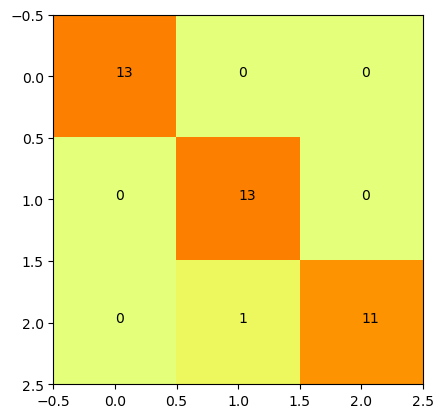

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
classNames = iris['target_names']
numClass = np.size(classNames)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
for i in range(numClass):
    for j in range(numClass):
        plt.text(j,i, str(cm[i][j]))

### Se muestra en detalle la función de distribución de cada clase

Como se distribuyen en cada clase de Iris las distintos caracteristicas analizadas según sus valores.

Se emplea __subplots(Filas, Columnas,[...])__ que permite realizar dibujos multiples en filas, columnas o cuadriculas. 

En cada dibujo se vuelca el histograma con el método __hist__ sobre los valores de cada característica y clase considerada. Para más detalle:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

<function matplotlib.pyplot.show(close=None, block=None)>

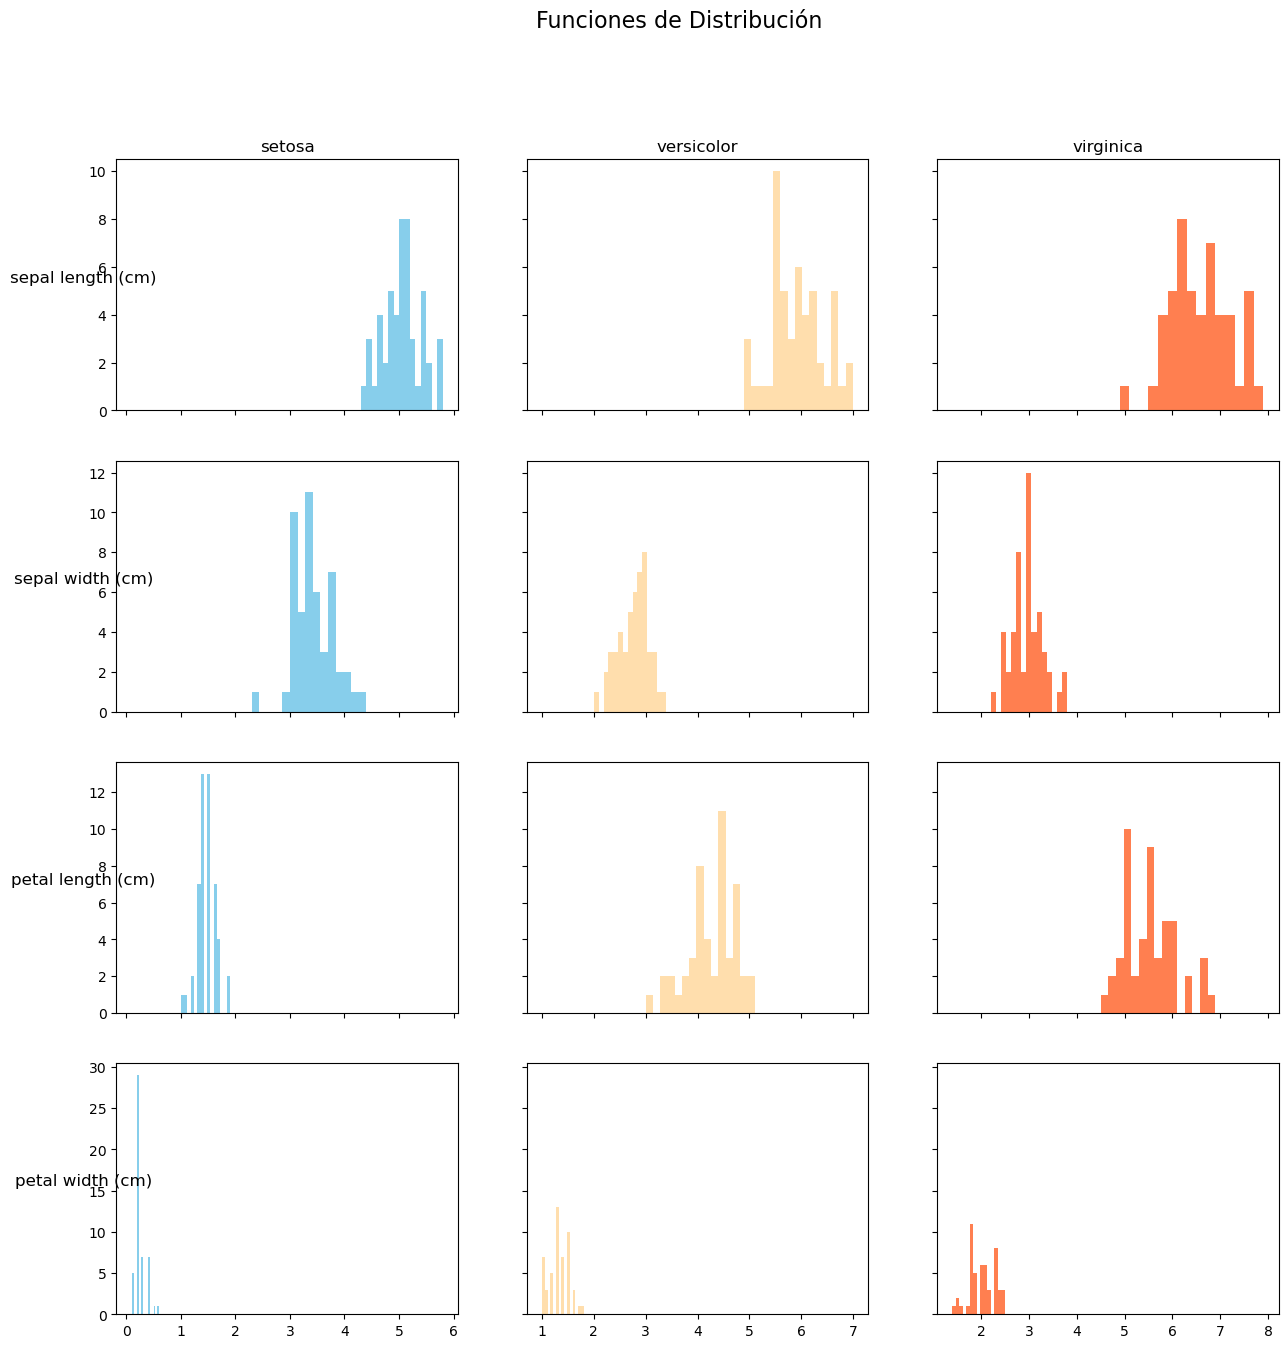

In [16]:
import matplotlib.pyplot as plt
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
className = iris['target_names']
y=df['target']
fig, ax = plt.subplots(np.size(cols), np.size(className), sharex='col', sharey='row', figsize=(15,15))
fig.suptitle('Funciones de Distribución', fontsize=16)
colors=["skyblue", "navajowhite", "coral"]
for i in range(np.size(cols)):
    _x = df[cols[i]]
    for j in range(np.size(className)):
        ax[i, j].hist(_x[y==j], bins=15, color = colors[j])
        if (i==0): ax[i, j].set_title(className[j])
        if (j==0): ax[i, j].set_ylabel(cols[i], rotation=0, size='large')
plt.show

## Se Resuelve utilizando el clasificador Naive Bayes de sklearn

Se utiliza el constructor __GaussianNB()__ de la clase __GaussianNB__ para crear el objeto __clf_NB__

Llamando al método __fit__ del objeto __clf_NB__ se ajusta el modelo contra el conjunto de entrenamiento.

Para validar el modelo se predicen las observaciones __X_test__ del conjunto de validación se comparan las clases obtenidas contra los valores correctos de __y_test__. El porcentaje de aciertos es la precisión del clasificador

In [17]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
tot_Test = np.size(y_test)
tot_aciertos = 0
y_pred = []
for x, y in zip(X_test, y_test):
    y_est = clf_NB.predict([x])
    y_pred.append(y_est)
    if (y==y_est): tot_aciertos +=1
    #print('Instancia %s Clase real %s - Clase estimada %s \n' %(x, y, y_est))
print('Exactitud del clasificador (porcentaje de aciertos) = %s \n' %(tot_aciertos*100/tot_Test))

Exactitud del clasificador (porcentaje de aciertos) = 97.36842105263158 



### Y la correspondiente matriz de confusión

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


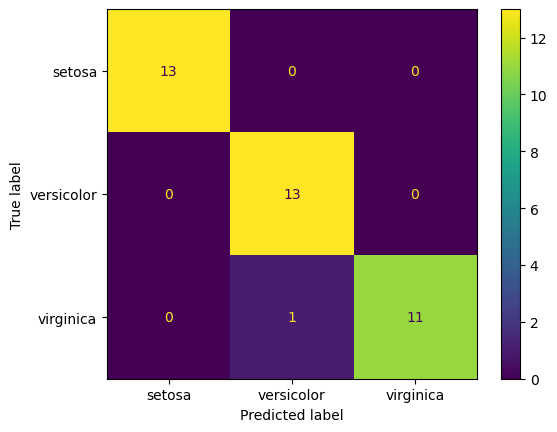

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=iris['target_names']).plot()